In [ ]:
import tensorflow as tf
import datetime
%load_ext tensorboard
print(tf.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
(x_train_, y_train),(x_test_,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train = x_train_ / 255.0
x_test = x_test_ / 255.0

print(f"train data shape: {x_train.shape}")
print(f"label train shape: {y_train.shape}")
print(f"test data shape: {x_test.shape}")
print(f"label test shape: {y_test.shape}")

# 32 32 x y 값 3 - rgb 값

train data shape: (50000, 32, 32, 3)
label train shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
label test shape: (10000, 1)


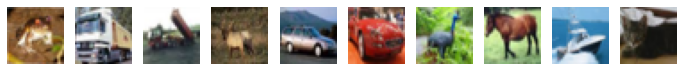

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,10,figsize=(12,6))
for i in range(10):  
  ax[i].set_axis_off()  
  ax[i].imshow(x_train_[i])
# train 50000 건 중 10개만 출력.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [ ]:
#모델 정의
def get_model():
  model = Sequential([
    #cnn 과정을 통해 output이 32 32로 나올 수가 없기에 남는 공간만큼
    #zero padding을 하여 output과 input의 사이즈를 유지            
    #input layer      #weight 역할       #zero padding.     
    Conv2D(filters=64,kernel_size=(3,3),padding='SAME',input_shape=(32, 32, 3),activation='relu',name='conv_1'),
    BatchNormalization(),

    Conv2D(filters=32,kernel_size=(3,3),padding='SAME',activation='relu',name='conv_2'),
    BatchNormalization(),

    MaxPooling2D(pool_size=(8,8),name='pool_1'),
    #
    Dropout(rate=0.5),
    #FC layer로 만듬.
    Flatten(name='flatten_1'),
    #relu dense layer
    Dense(16,activation='relu',name='dense_1'),
    #Dense layer, 출력전 0과1 사이로 소프트맥스 함수를 이용해 출력
    Dense(10,activation='softmax',name='dense_2')  ])  
  #adam 기법으로 최적화
  opt = tf.optimizers.Adam(learning_rate=0.005)  
  #정확도를 sparse_categorical_crossentropy로 처리
  acc = tf.metrics.SparseCategoricalAccuracy()  
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        18464     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 pool_1 (MaxPooling2D)       (None, 4, 4, 32)          0         
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 32)         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
#학습 중 성능 상향폭이 patience 횟수동안 늘어나지 않으면 중지.
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min')
#
learning_rate_reduction = ReduceLROnPlateau(patience=4, monitor='val_loss',factor=0.1)

!mkdir -p '/content/gdrive/MyDrive/Colab CAI/data/cifar10/model_checkpoints_best/‘
checkpoint_best_path = '/content/gdrive/MyDrive/Colab CAI/data/cifar10/model_checkpoints_best/checkpoint'
checkpoint_best = ModelCheckpoint(
    filepath = checkpoint_best_path,     
    save_weights_only = True,    
    save_freq = 'epoch',    
    monitor = 'val_loss',     
    save_best_only = True,    
    verbose = 1)
#logging
log_dir = '/content/gdrive/MyDrive/Colab CAI/data/cifar10/logs/' + \
 datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
callbacks = [early_stopping,learning_rate_reduction,checkpoint_best,tensorboard_callback]

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[callbacks])

Epoch 1/10
1559/1563 [============================>.] - ETA: 0s - loss: 1.8773 - sparse_categorical_accuracy: 0.2864
Epoch 1: val_loss improved from inf to 1.70680, saving model to /content/gdrive/MyDrive/Colab CAI/data/cifar10/model_checkpoints_best/checkpoint
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8766 - sparse_categorical_accuracy: 0.2867 - val_loss: 1.7068 - val_sparse_categorical_accuracy: 0.3869 - lr: 0.0050
Epoch 2/10
1559/1563 [============================>.] - ETA: 0s - loss: 1.4247 - sparse_categorical_accuracy: 0.4824
Epoch 2: val_loss improved from 1.70680 to 1.21859, saving model to /content/gdrive/MyDrive/Colab CAI/data/cifar10/model_checkpoints_best/checkpoint
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4248 - sparse_categorical_accuracy: 0.4825 - val_loss: 1.2186 - val_sparse_categorical_accuracy: 0.5606 - lr: 0.0050
Epoch 3/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.2661 - sparse_categorical_

In [ ]:
%cd '/content/gdrive/MyDrive/Colab CAI/data/cifar10/'
%tensorboard --logdir logs

In [ ]:
filepath = '/content/gdrive/MyDrive/Colab CAI/data/cifar10/cifar10.h5'
model.save(filepath = filepath)

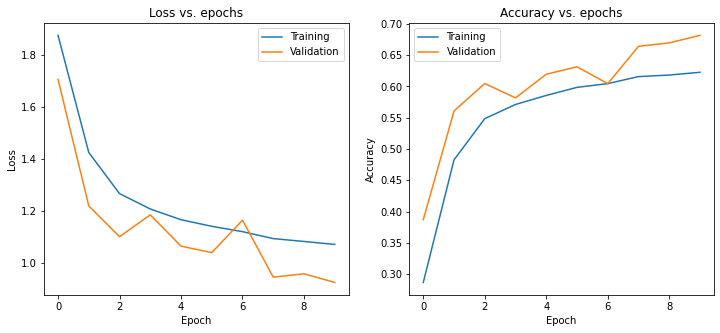

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')

fig.add_subplot(122)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')

plt.show()

In [ ]:
def get_test_accuracy(model, x_test, y_test):
  # verbose: 'auto',0,1,or 2. Verbosity mode. 0=silent, 1=progress bar, 2=one line per epoch.
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  return test_loss, test_acc

In [ ]:
test_loss, test_accuracy = get_test_accuracy(model, x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 1.0233139991760254
Test accuracy: 0.6470000147819519


In [ ]:
model2 = get_model()
model2.load_weights(checkpoint_best_path)
test_loss, test_accuracy = get_test_accuracy(model2, x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 0.9949213862419128
Test accuracy: 0.6425999999046326


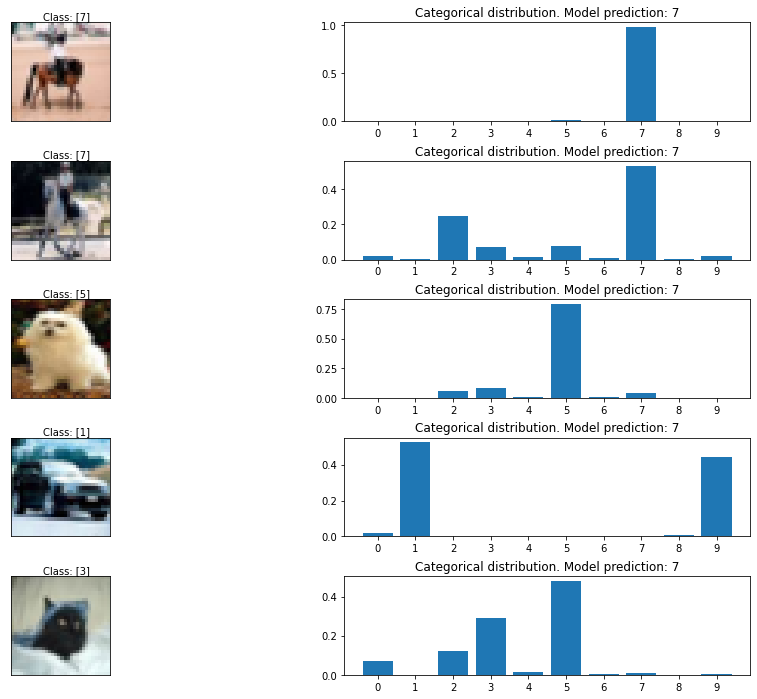

In [ ]:
import numpy as np
num_test_images = y_test.shape[0]
# choice# 0 이상 num_test_images 미만인정수중 5개를출력
random_idx = np.random.choice(num_test_images,5)
random_test_images = x_test[random_idx, ...]
random_test_labels = y_test[random_idx, ...]
predictions = model2.predict(random_test_images)
fig, axes = plt.subplots(5,2,figsize=(16,12))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i, (prediction, images, labels) in enumerate(zip(predictions, random_test_images, 
random_test_labels)):  
  axes[i,0].imshow(np.squeeze(images))  
  axes[i,0].get_xaxis().set_visible(False)  
  axes[i,0].get_yaxis().set_visible(False)  
  axes[i,0].text(10., -1.5, f'Class: {labels}') 
  axes[i,1].bar(np.arange(len(prediction)), prediction)  
  axes[i,1].set_xticks(np.arange(len(prediction)))  
  axes[i,1].set_title(f'Categorical distribution. Model prediction: {np.argmax(predictions)}')

plt.show()